**Analyse et segmentation de clientèle d'un magasin avec campagnes de marketing**
_Jules EXBRAYAT & Abdenour MADANI_

# Présentation

## Problématique

Quel est le client type de l'entreprise ?

Peut-on créer des groupes de clients, afin de cibler efficacement les potentiels clients et personnalisé la campagne marketing ?

## Jeu de données

### Lecture des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
sns.set()

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep="\t", index_col="ID")

### Présentation des variables

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 28 variables et 2240 individus.


#### Variables

- ID: identifiant du client
- Year_Birth: numérique, année de naissance du client
- Education: qualitative, niveau d'éducation
- Marital_Status: qualitative, statut marital
- Income: numérique, revenu annuel en $
- Kidhome: numérique, nombre d'enfants en bas-âge
- Teenhome: numérique, nombre d'enfants adolescents
- Dt_Customer: date, date à laquelle le client s'est inscrit
- Recency: numérique, nombre de jours depuis le dernier achat
- Complain: catégorique, est-ce que le client s'est plaint les 2 dernières années (0 ou 1)

#### Products

- MntWines: numérique, argent dépensé les 2 dernières années en vin
- MntFruits: numérique, argent dépensé les 2 dernières années en fruits
- MntMeatProducts: numérique, argent dépensé les 2 dernières années en viande
- MntFishProducts: numérique, argent dépensé les 2 dernières années en poisson
- MntSweetProducts: numérique, argent dépensé les 2 dernières années en bonbons / gâteaux
- MntGoldProds: numérique, argent dépensé les 2 dernières années en bijoux / or

#### Promotion

- NumDealsPurchases: numérique, nombre d'achats effectués avec une promotion
- AcceptedCmp1: catégorique, le client a-t-il acheté durant la campagne promotionnelle numéro 1 (1 s'il a acheté, 0 sinon)
- AcceptedCmp2: pareil pour la campagne numéro 2
- AcceptedCmp3: pareil pour la campagne numéro 3
- AcceptedCmp4: pareil pour la campagne numéro 4
- AcceptedCmp5: pareil pour la campagne numéro 5
- Response: catégorique, 1 si le client a acheté durant la dernière campagne, 0 sinon (potentielle variable à prédire)

#### Place

- NumWebPurchases: numérique, nombre d'achats effectués sur le site Internet
- NumCatalogPurchases: numérique, nombre d'achats effectués via le catalogue
- NumStorePurchases: numérique, nombre d'achats effectués en magasin
- NumWebVisitsMonth: numérique, nombre de visites sur le site Internet le dernier mois


In [ ]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [ ]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Dt_Customer",
    "Complain",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

# Découverte des données

In [ ]:
# todo :
# - moyenne, variance, écart type, min max
# - box plot
# - matrice de corrélation

## Analyse univariée (?)

## Visualisation

<Axes: xlabel='Count', ylabel='Marital_Status'>

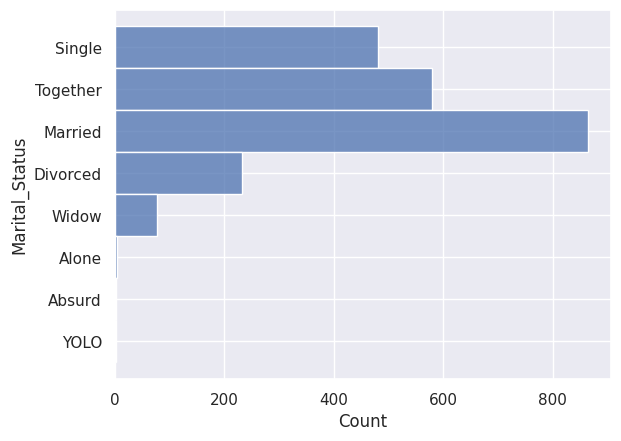

In [ ]:
sns.histplot(y=df["Marital_Status"])

In [ ]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

<Axes: xlabel='Count', ylabel='Education'>

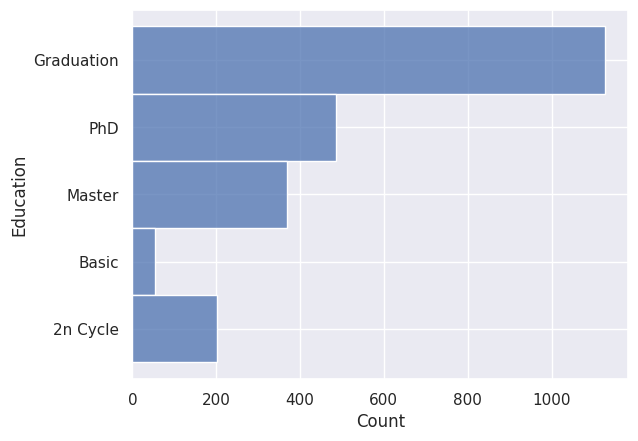

In [ ]:
sns.histplot(y=df["Education"])

## A trier

In [ ]:
df.nunique()  # nombre de valeurs possibles pour chaque variable

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

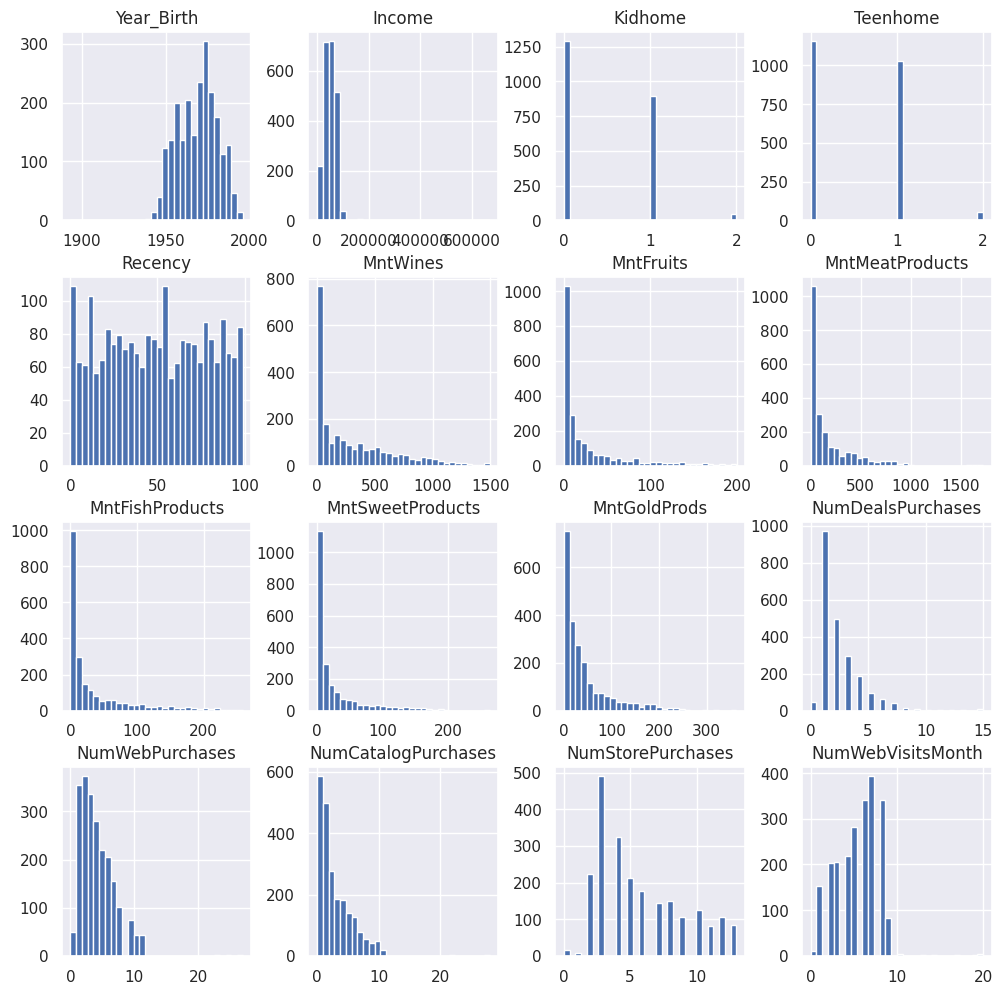

In [ ]:
df[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

# Nettoyage des données

## Données parasites


### Variables

Dans le jeu de données, 2 colonnes sont non documentées et contiennent des valeurs constantes :
- `Z_CostContact`
- `Z_Revenue`

**Variable `Z_CostContact`**

Il y a 2240 / 2240 individus pour lesquelles la variable Z_CostContact vaut 3.


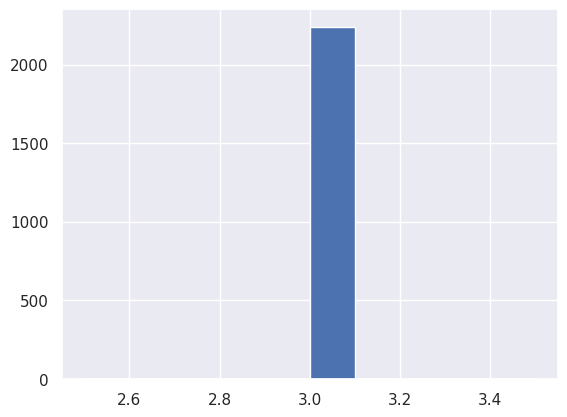

In [ ]:
print(
    f'Il y a {np.sum(df["Z_CostContact"] == 3)} / 2240 individus pour lesquelles la variable Z_CostContact vaut 3.'
)

plt.hist(df["Z_CostContact"])
plt.show()

**Variable `Z_Revenue`**

Il y a 2240 / 2240 individus pour lesquelles la variable Z_Revenue vaut 11.


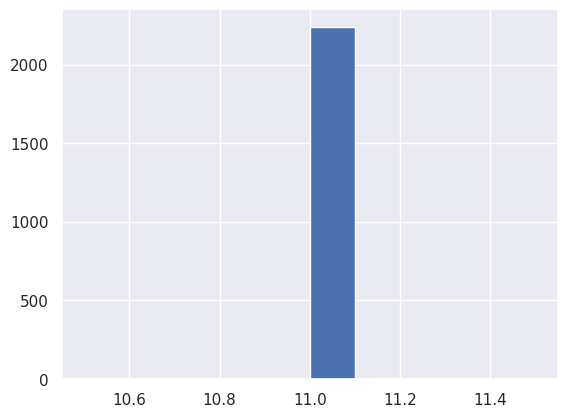

In [ ]:
print(
    f'Il y a {np.sum(df["Z_Revenue"] == 11)} / 2240 individus pour lesquelles la variable Z_Revenue vaut 11.'
)

plt.hist(df["Z_Revenue"])
plt.show()

On décide de les supprimer, car elles sont parasites et ne fournissent pas d'information.

In [ ]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

### Valeurs

#### Statut marital

<Axes: xlabel='Count', ylabel='Marital_Status'>

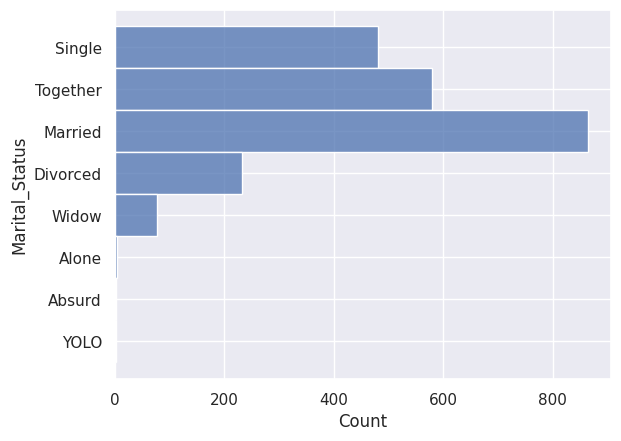

In [ ]:
sns.histplot(y=df["Marital_Status"])

Parmi les situations maritales, on observe "absurde" et "YOLO" (You Only Live Once, _on ne vit qu'une fois_).

Comme on ne peut pas déduire ce que veut dire "absurde" dans ce contexte, on se décide de supprimer l'individu.
De même, on suppose que la personne ayant répondu "YOLO", donc ayant répondu de façon humoristique, doit être supprimée du jeu de données.

In [ ]:
df.drop(index=df.loc[df["Marital_Status"] == "YOLO"].index, inplace=True)
df.drop(index=df.loc[df["Marital_Status"] == "Absurd"].index, inplace=True)

<Axes: xlabel='Count', ylabel='Marital_Status'>

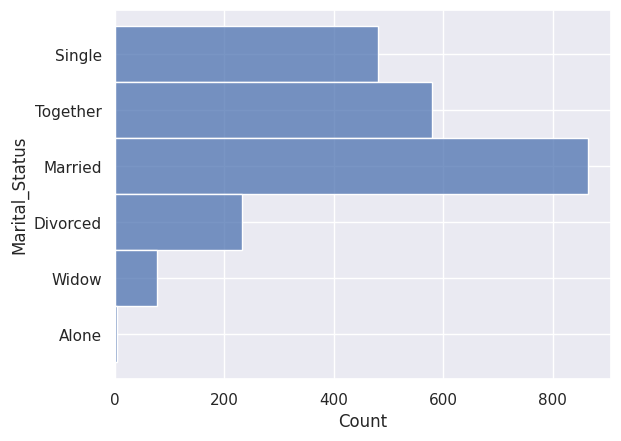

In [ ]:
sns.histplot(y=df["Marital_Status"])

## Données dupliquées

### Individus

In [ ]:
df.duplicated()

ID
5524     False
2174     False
4141     False
6182     False
5324     False
         ...  
10870    False
4001      True
7270     False
8235     False
9405     False
Length: 2236, dtype: bool

In [ ]:
sum(df.duplicated())

182

In [ ]:
# todo: dire qu'il y a 182 données dupliquéees, car les données ont probablement été fusionnées de plusieurs sources avec une intersection => on va donc supprimer les doublons

In [ ]:
df[df.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
4119,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,17,...,5,3,3,0,0,0,0,0,0,0
6935,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,26,...,7,12,2,0,0,0,1,0,0,0
10144,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,7,...,2,4,8,0,0,0,0,0,0,0
8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,...,1,6,7,0,0,0,0,0,0,0
933,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,0,...,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,1978,Graduation,Together,22775.0,1,0,19-06-2013,40,5,1,...,0,2,8,0,0,0,0,0,0,0
7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,26,...,6,11,1,0,1,1,0,0,0,1
4749,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,24,...,2,6,7,0,0,0,0,0,0,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
sum(df.duplicated())

0

## Standardisation

### Modalités de variables catégoriques

<Axes: xlabel='Count', ylabel='Marital_Status'>

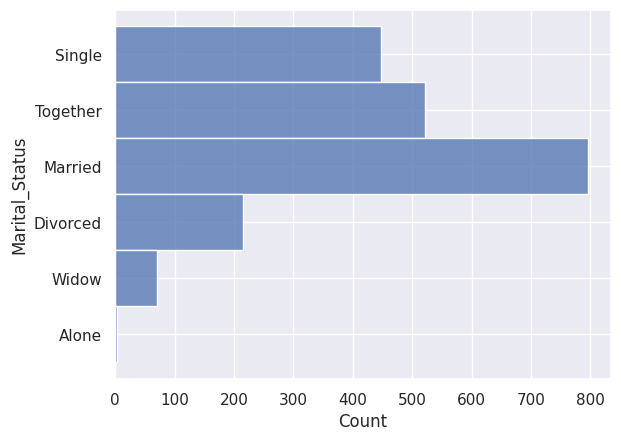

In [ ]:
sns.histplot(y=df["Marital_Status"])

Sans plus d'information, "Alone" est une autre formulation de "Single", on décide donc de remplacer "Alone" par "Single".

In [ ]:
df["Marital_Status"].replace("Alone", "Single", inplace=True)

<Axes: xlabel='Count', ylabel='Marital_Status'>

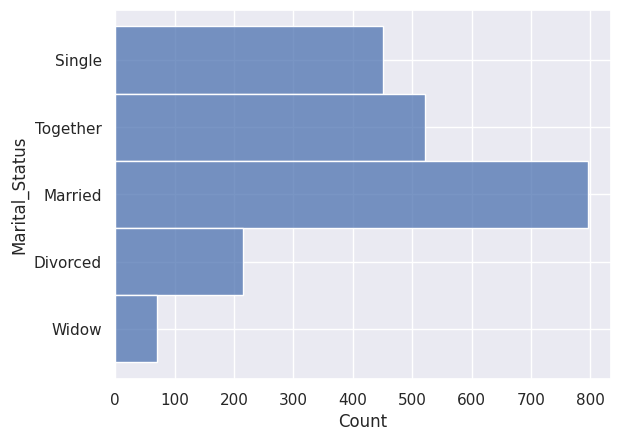

In [ ]:
sns.histplot(y=df["Marital_Status"])

## Valeurs extrêmes

### Income

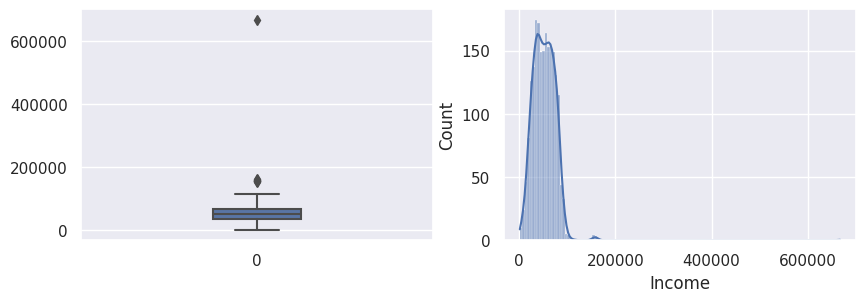

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

In [ ]:
# todo: texte pour commenter

In [ ]:
df["Income"][df["Income"] > 200_000]

ID
9432    666666.0
Name: Income, dtype: float64

In [ ]:
# todo(ab2): écrire un texte, du style : Pour nous, il s'agit d'une valeur aberrante à supprimer du jeu de données car "666 666" ne semble pas être une valeur réelle (6 fois le nombre 6...)

In [ ]:
df.drop(index=df[df["Income"] > 200_000].index, inplace=True)

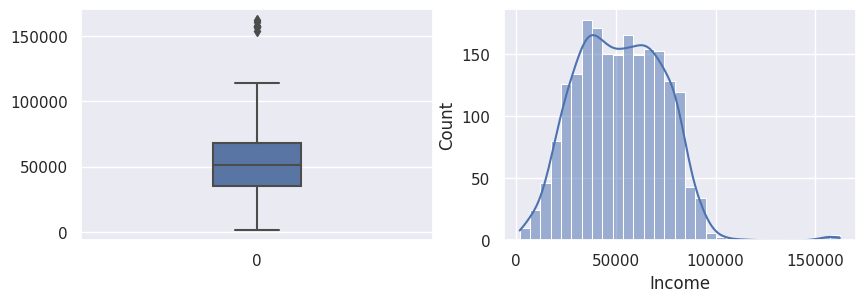

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

In [ ]:
# todo: est-ce qu'on retire les valeurs au-dessus de 120 000 ? comment on le justifie ?
# => ce serait plutôt des individus ATYPIQUES, à enlever mais garder de côté pour l'analyse a posteriori

In [ ]:
df.drop(index=df[df["Income"] > 120_000].index, inplace=True)

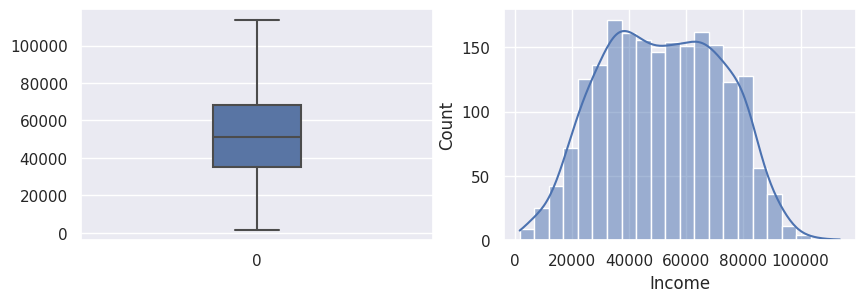

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

### Year Date

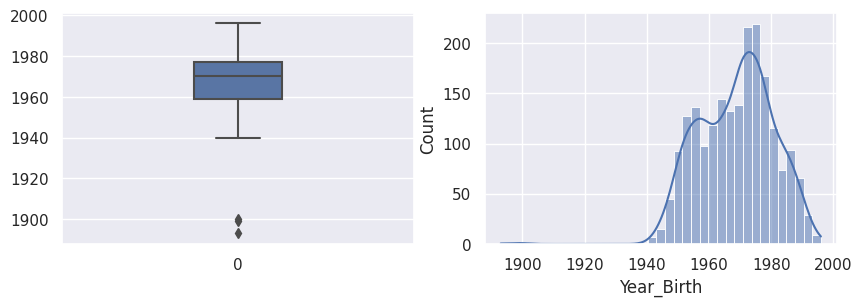

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Year_Birth"], width=0.25, ax=ax[0])
sns.histplot(df["Year_Birth"], kde=True, ax=ax[1])
plt.show()

In [ ]:
df[df["Year_Birth"] < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,1,2,5,0,0,0,0,0,1,0
11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,0,2,4,0,0,0,0,0,0,0
1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,6,4,1,0,0,1,0,0,0,0


Comme les personnes les plus âgées au monde ont très rarement plus de 100 ans, et que nous sommes en 2023, on peut sans problème estimer que les trois dates de naissance avant 1920 sont erronées.

Pour les deux années 1893 et 1899, on peut s'imaginer que les personnes ont fait une faute de frappe, et voulaient écrire, respectivement, 1983 et 1989.

In [ ]:
df.loc[df["Year_Birth"] == 1893, "Year_Birth"] = 1983
df.loc[df["Year_Birth"] == 1899, "Year_Birth"] = 1989

Pour l'année 1900, il est difficile d'imaginer une faute de frappe, il s'agit peut-être de la valeur par défaut.
On peut tout simplement supprimer la ligne correspondante.

In [ ]:
df.drop(index=df.loc[df["Year_Birth"] == 1900, "Year_Birth"].index, inplace=True)

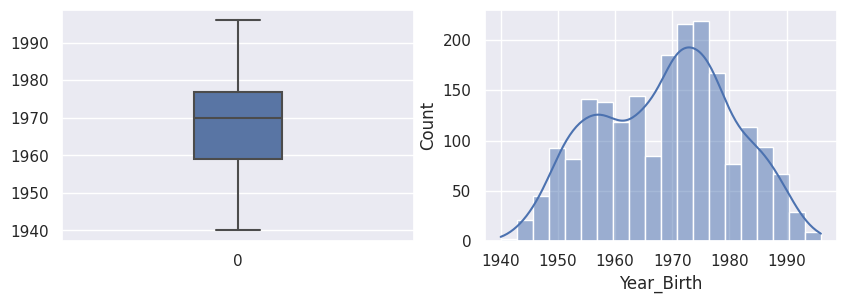

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Year_Birth"], width=0.25, ax=ax[0])
sns.histplot(df["Year_Birth"], kde=True, ax=ax[1])
plt.show()

## Valeurs manquantes

In [ ]:
# todo : explications etc

In [ ]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
df["Income"][df["Income"].isna()]

ID
1994    NaN
5255    NaN
7281    NaN
7244    NaN
8557    NaN
10629   NaN
8996    NaN
9235    NaN
5798    NaN
8268    NaN
1295    NaN
2437    NaN
2863    NaN
10475   NaN
2902    NaN
4345    NaN
3769    NaN
7187    NaN
1612    NaN
5079    NaN
10339   NaN
3117    NaN
5250    NaN
8720    NaN
Name: Income, dtype: float64

In [ ]:
# TODO: supprimer valeurs manquantes OU remplacer par la moyenne ?

In [ ]:
# todo: expliquer POURQUOI ces données sont manquantes (notre hypothèse du moins), et expliquer notre démarche en conséquence

### Remplacement par la moyenne

In [ ]:
# TODO: refaire cette partie proprement

In [ ]:
income_mean = df["Income"].mean()

df_filtered = df[df["Income"].isna()]
df_filtered["Income"] = np.repeat(income_mean, 24)

df[df["Income"].isna()] = df_filtered
# Vérification du bon remplacement des valeurs manquantes
df[df["Income"].isna()].head()

/tmp/ipykernel_21161/4124025541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Income"] = np.repeat(income_mean, 24)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,...,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,1968.884108,51679.701633,0.446455,0.510513,48.969682,305.080196,26.295355,165.979462,37.341809,27.310024,...,2.630318,5.791198,5.337408,0.073839,0.077262,0.071883,0.065526,0.012714,0.009291,0.152078
std,11.674640,20596.220199,0.537892,0.546750,28.966916,337.059189,39.797258,221.604551,54.523097,41.793755,...,2.793139,3.232346,2.426129,0.261572,0.267071,0.258357,0.247512,0.112064,0.095964,0.359185
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35682.000000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51679.701633,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68092.000000,1.000000,1.000000,74.000000,505.000000,33.000000,228.000000,50.000000,34.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualisation

In [ ]:
# todo: renommer cette partie ? / mettre un texte introductif pour expliquer la démarche ("Une fois les données nettoyées, on les explore de nouveau, plus en profondeur")

In [ ]:
# todo: organiser en plusieurs sous-parties

In [ ]:
# todo: choisir les représentations les plus pertinentes à montrer ci-dessous

<seaborn.axisgrid.FacetGrid>

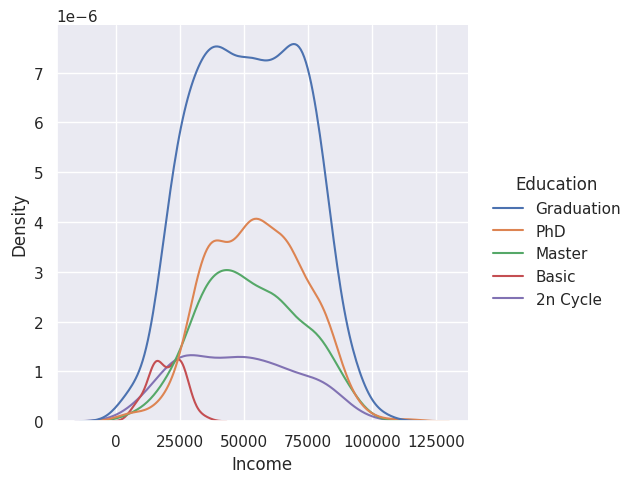

In [ ]:
sns.displot(df, x="Income", hue="Education", kind="kde")

<Axes: xlabel='Income', ylabel='MntMeatProducts'>

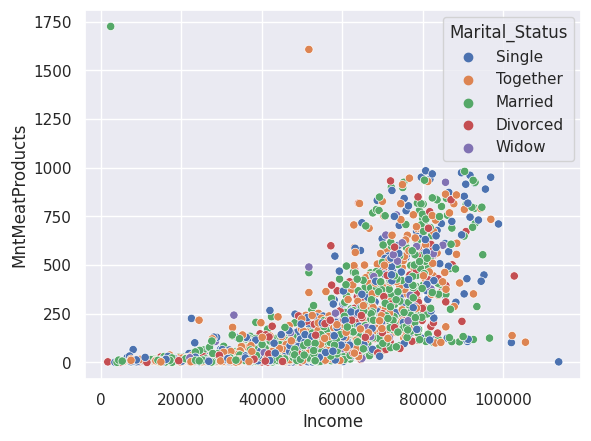

In [ ]:
sns.scatterplot(data=df, x="Income", y="MntMeatProducts", hue="Marital_Status")

<Axes: xlabel='Education', ylabel='Count'>

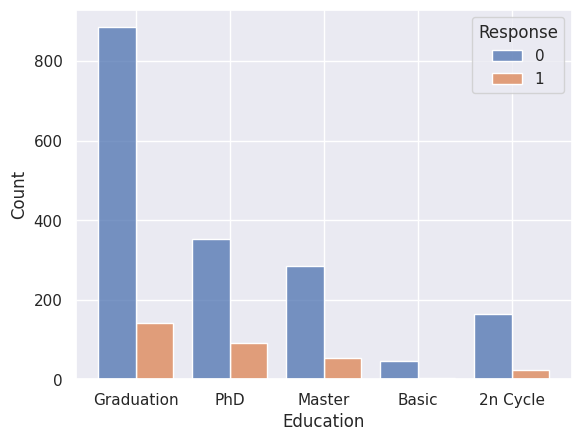

In [ ]:
sns.histplot(data=df, x="Education", hue="Response", multiple="dodge", shrink=0.8)

<Axes: xlabel='Education', ylabel='Count'>

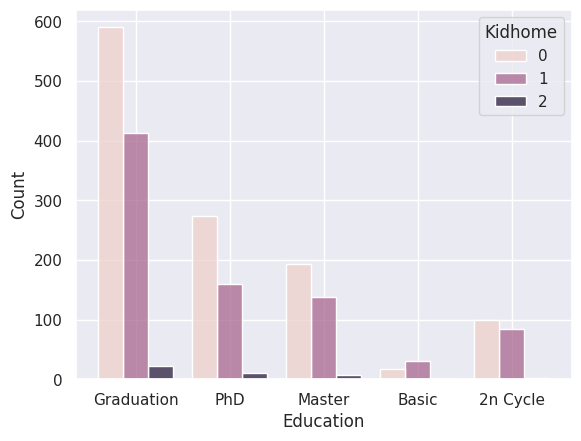

In [ ]:
sns.histplot(data=df, x="Education", hue="Kidhome", multiple="dodge", shrink=0.8)

<Axes: xlabel='Marital_Status', ylabel='Count'>

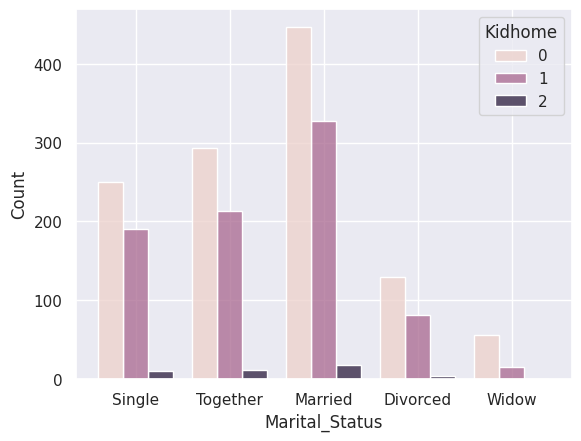

In [ ]:
sns.histplot(data=df, x="Marital_Status", hue="Kidhome", multiple="dodge", shrink=0.8)

<seaborn.axisgrid.FacetGrid>

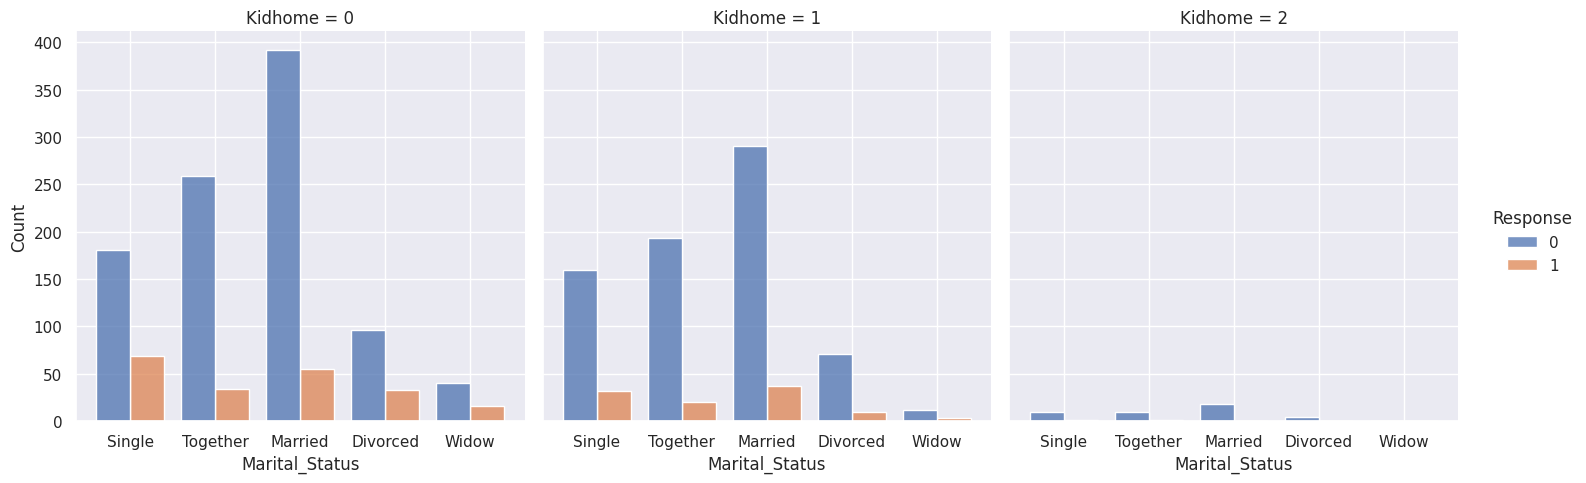

In [ ]:
sns.displot(
    data=df,
    x="Marital_Status",
    hue="Response",
    col="Kidhome",
    multiple="dodge",
    shrink=0.8,
)

<Axes: xlabel='Education', ylabel='Count'>

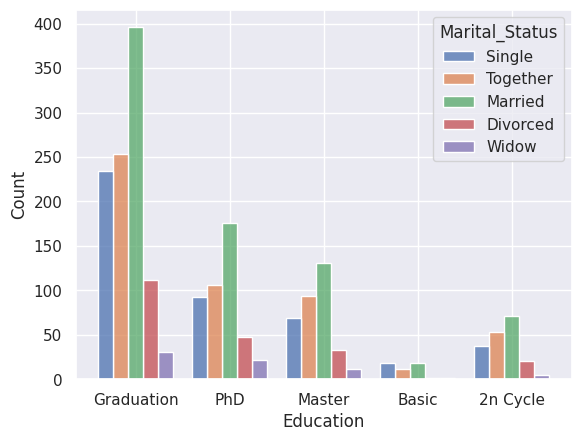

In [ ]:
sns.histplot(data=df, x="Education", hue="Marital_Status", multiple="dodge", shrink=0.8)

# Transformation des données

In [ ]:
df_transforme = df.copy()

## Mise à l'échelle (réduction ?)

### Explication

In [ ]:
# todo: expliquer pourquoi on a envie de le faire

### Sélection des variables

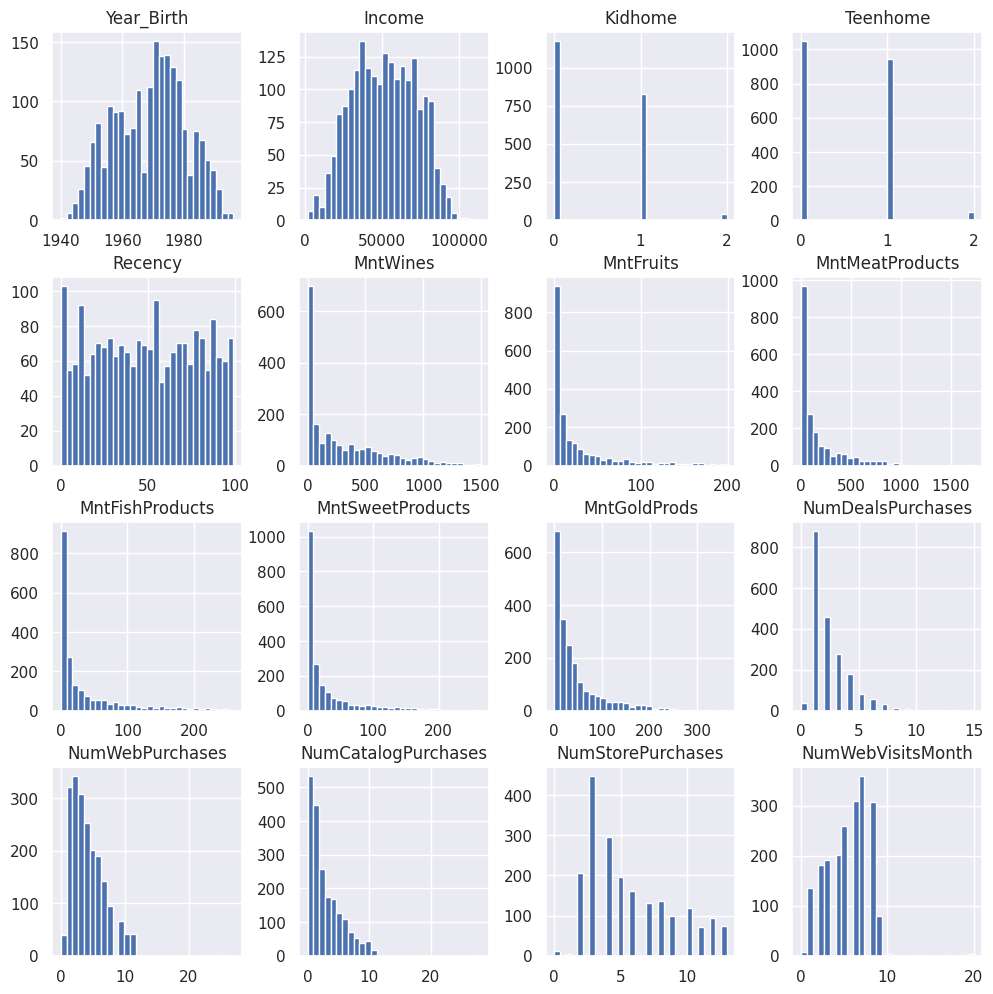

In [ ]:
df[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

In [ ]:
# todo(prof): est-ce que notre choix de variables est bon ?
var_a_scaler = [
    "Year_Birth",
    "Income",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
]

<Axes: >

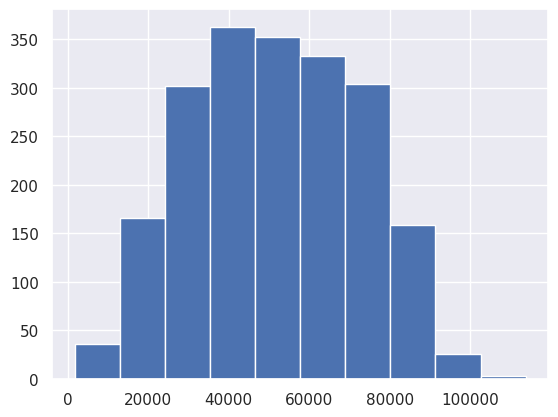

In [ ]:
df["Income"].hist()

<Axes: >

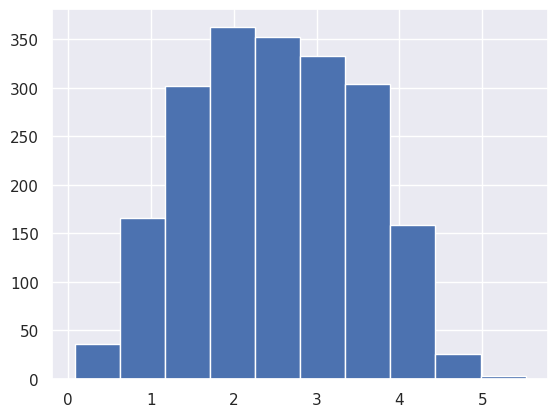

In [ ]:
(df["Income"] / df["Income"].std()).hist()

In [ ]:
for var in var_a_scaler:
    df_transforme[var] = df[var] / df[var].std()
    df_transforme[var] -= df_transforme[var].min()

### Conclusion

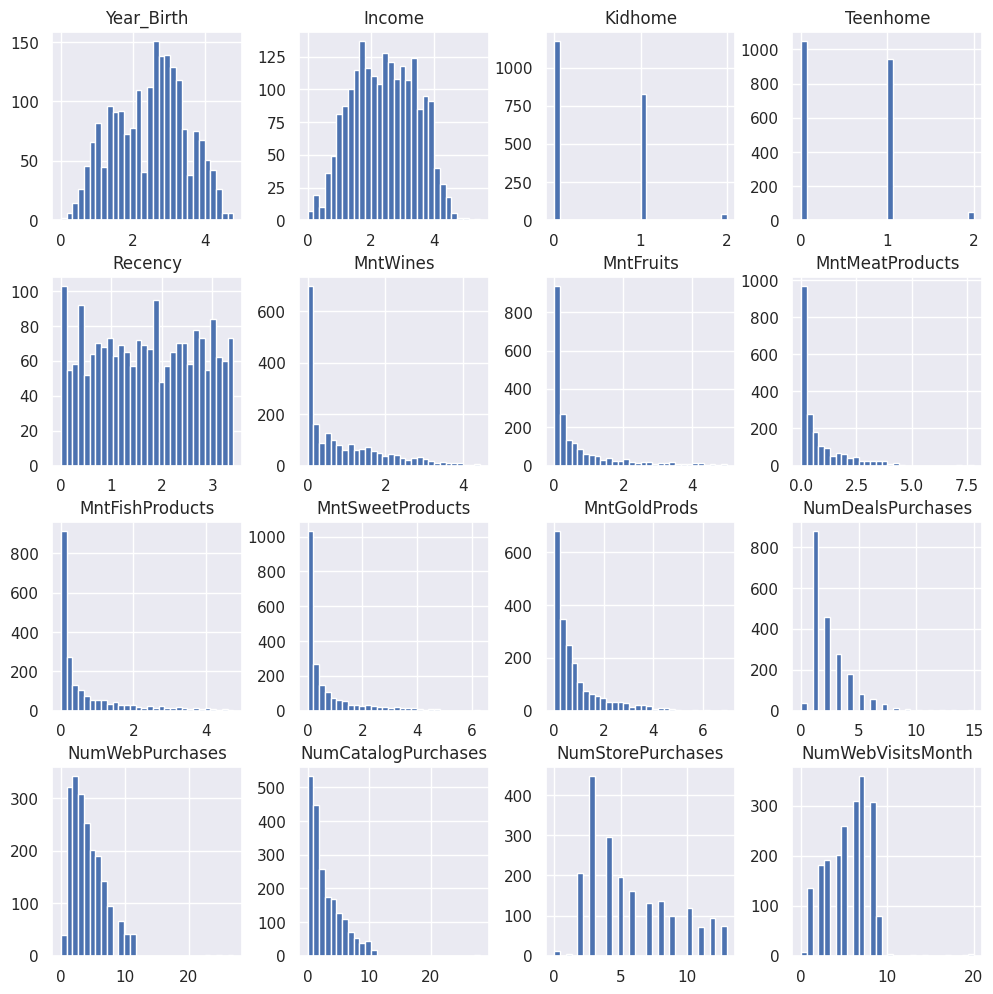

In [ ]:
df_transforme[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

Les changements sur la matrice de corrélation sont de l'ordre de $10^{-15}$, donc extrêmement négligeables.

<Axes: >

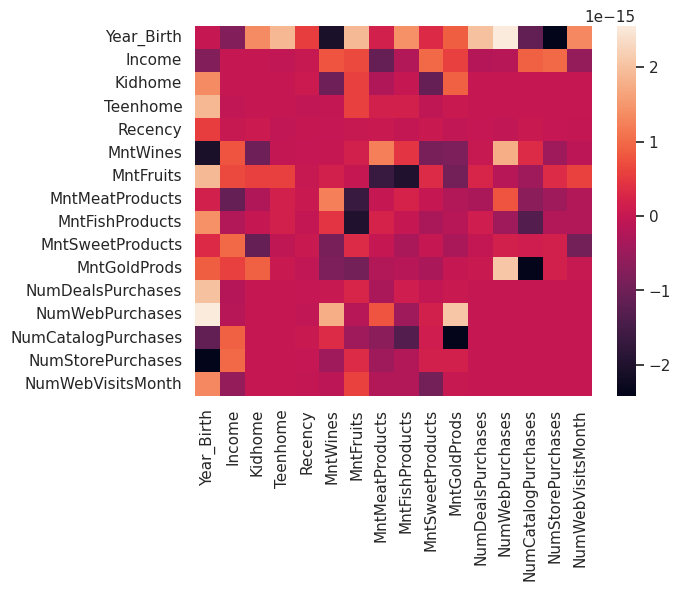

In [ ]:
sns.heatmap(df_transforme[var_numeriques].corr() - df[var_numeriques].corr())

## Normalisation

### Explication

Pour normaliser les données, nous allons utiliser la transformation de Box-Cox, définie $\forall x > 0, $ comme ci-dessous :
$B(x, \lambda) = \begin{cases} \frac{x^{\lambda} - 1}{\lambda} & \text{  si } \lambda \neq 0 \\ \log(x) & \text{  si } \lambda = 0 \end{cases}$

Cette transformation est à appliquer à une variable (strictement positive), en ajustant le $\lambda$ pour maximiser la normalité.

Nous allons utiliser la librairie `scipy.stats.boxcox` qui estime le meilleur paramètre $\lambda$.

### Sélection des variables

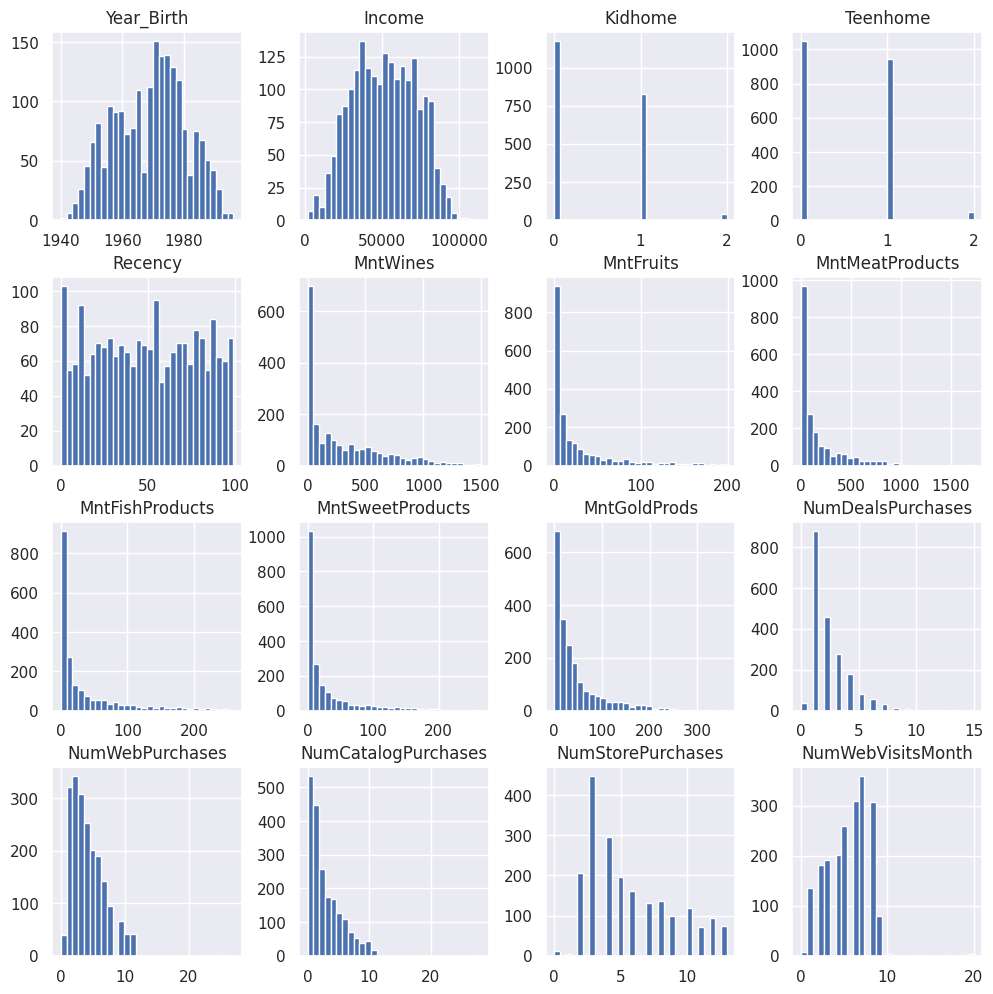

In [ ]:
df[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

In [ ]:
# todo(prof): faut-il inclure la distribution uniforme Recency ?
# todo(prof): est-ce que notre choix de variables est bon ?
var_a_normaliser = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
]

### Transformation

<Axes: xlabel='MntWines', ylabel='Count'>

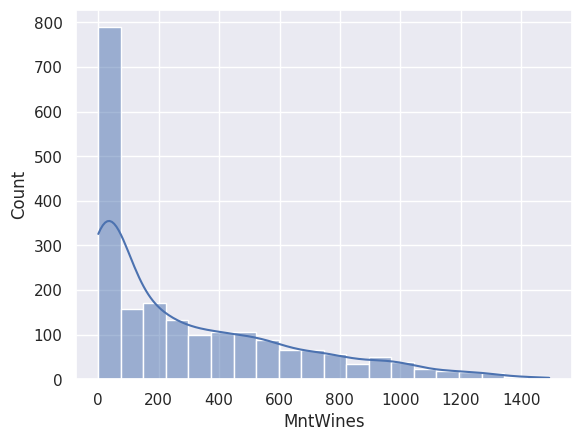

In [ ]:
sns.histplot(df["MntWines"], kde=True)

In [ ]:
from scipy.stats import boxcox

In [ ]:
boxcox_lambdas = {}  # on garde les lambdas, pour la transformation inverse

In [ ]:
for var in var_a_normaliser:
    var_strict_positif = df[var] + df[var].min() + 1
    var_apres_boxcox, l = boxcox(var_strict_positif)

    df_transforme[var] = pd.DataFrame(var_apres_boxcox)
    boxcox_lambdas[var] = l

In [ ]:
# Tuto : comment récupérer la fonction initiale
# (il faut avoir récupéré le paramètre "l" lambda)

# from scipy.special import inv_boxcox
# initial = inv_boxcox(incbox, l)
# initial = pd.DataFrame(initial)
# sns.histplot(initial, bins=50, kde=True)

<Axes: xlabel='MntWines', ylabel='Count'>

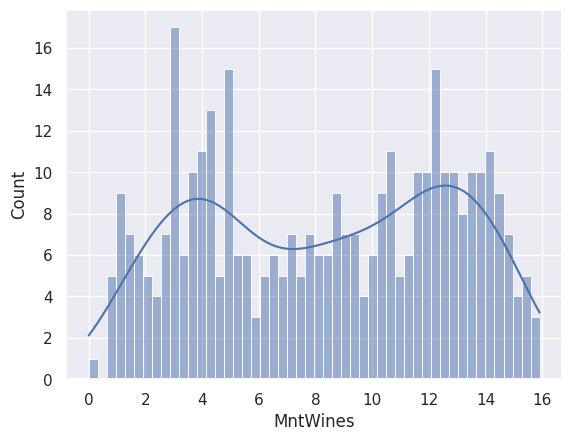

In [ ]:
sns.histplot(df_transforme["MntWines"], bins=50, kde=True)

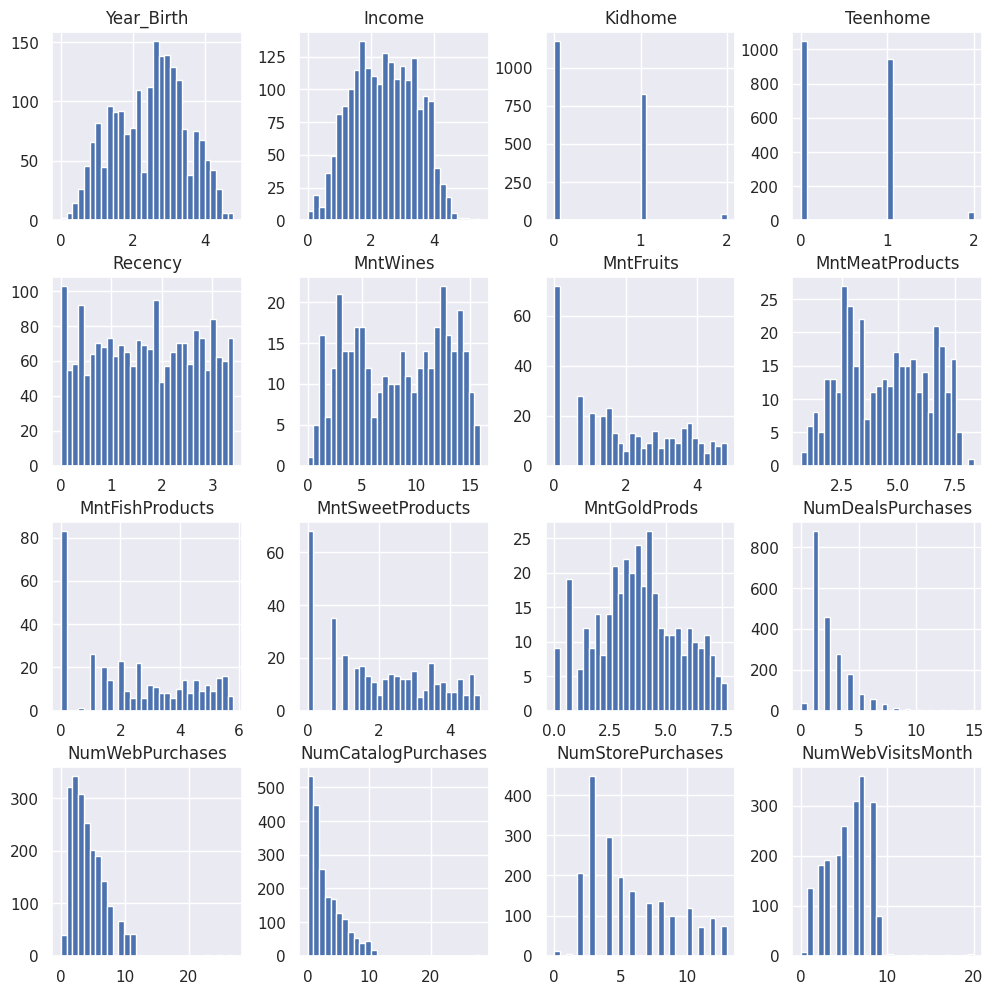

In [ ]:
df_transforme[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

### Conclusion

In [ ]:
# todo: analyser les résultats, notamment l'impact sur la matrice de corrélation (du coup, mettre ci-dessous la matrice de corrélation pré-transformation et comparer)

<Axes: >

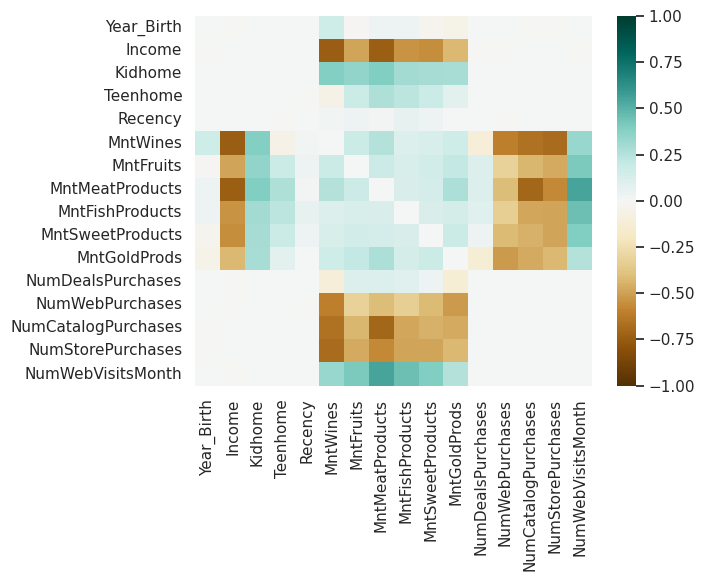

In [ ]:
sns.heatmap(
    df_transforme[var_numeriques].corr() - df[var_numeriques].corr(),
    cmap="BrBG",
    vmin=-1,
    vmax=1,
)

<Axes: >

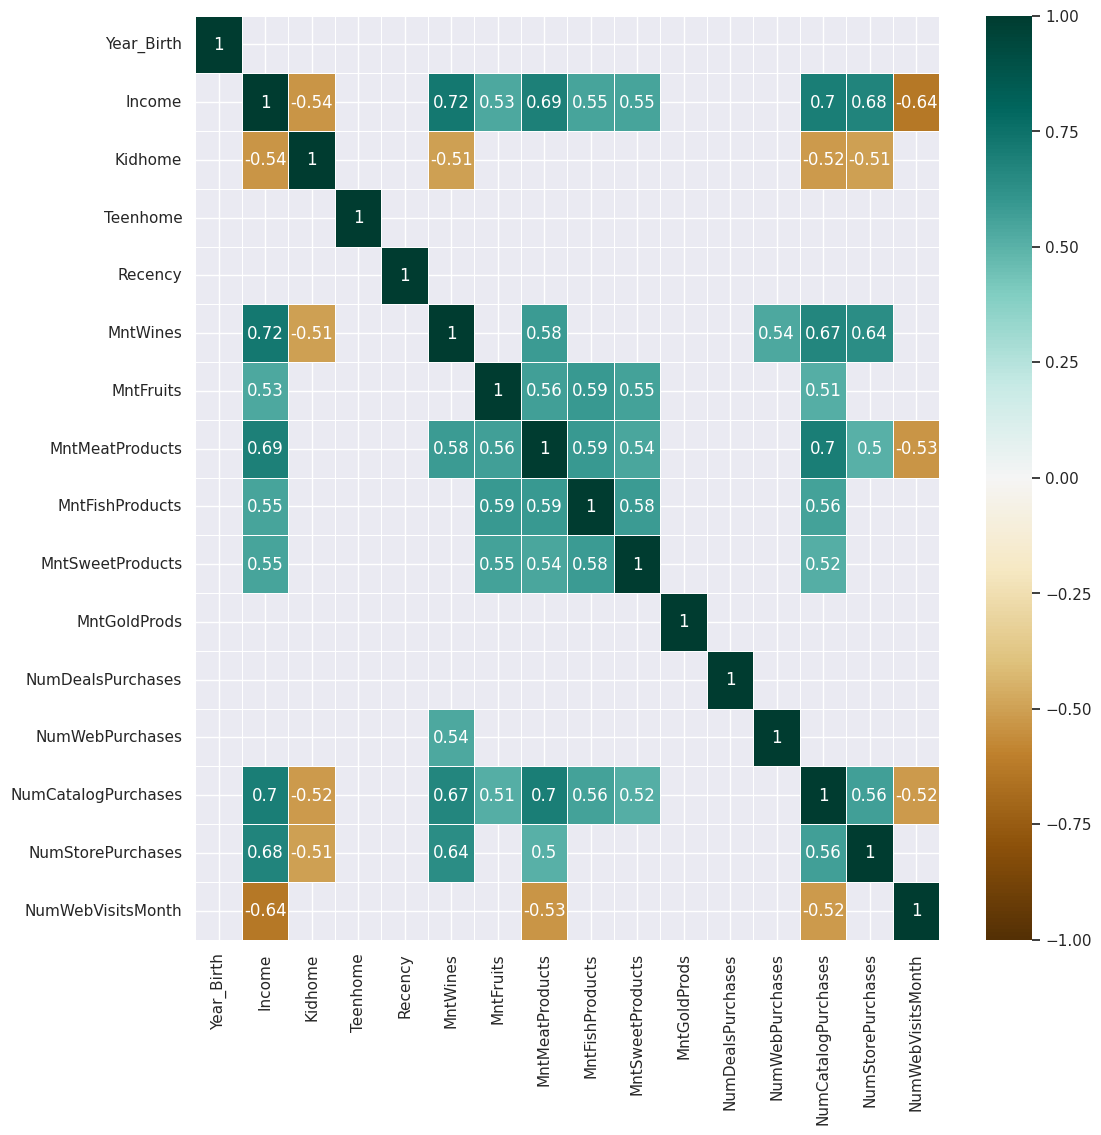

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df[var_numeriques].corr()[df[var_numeriques].corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

<Axes: >

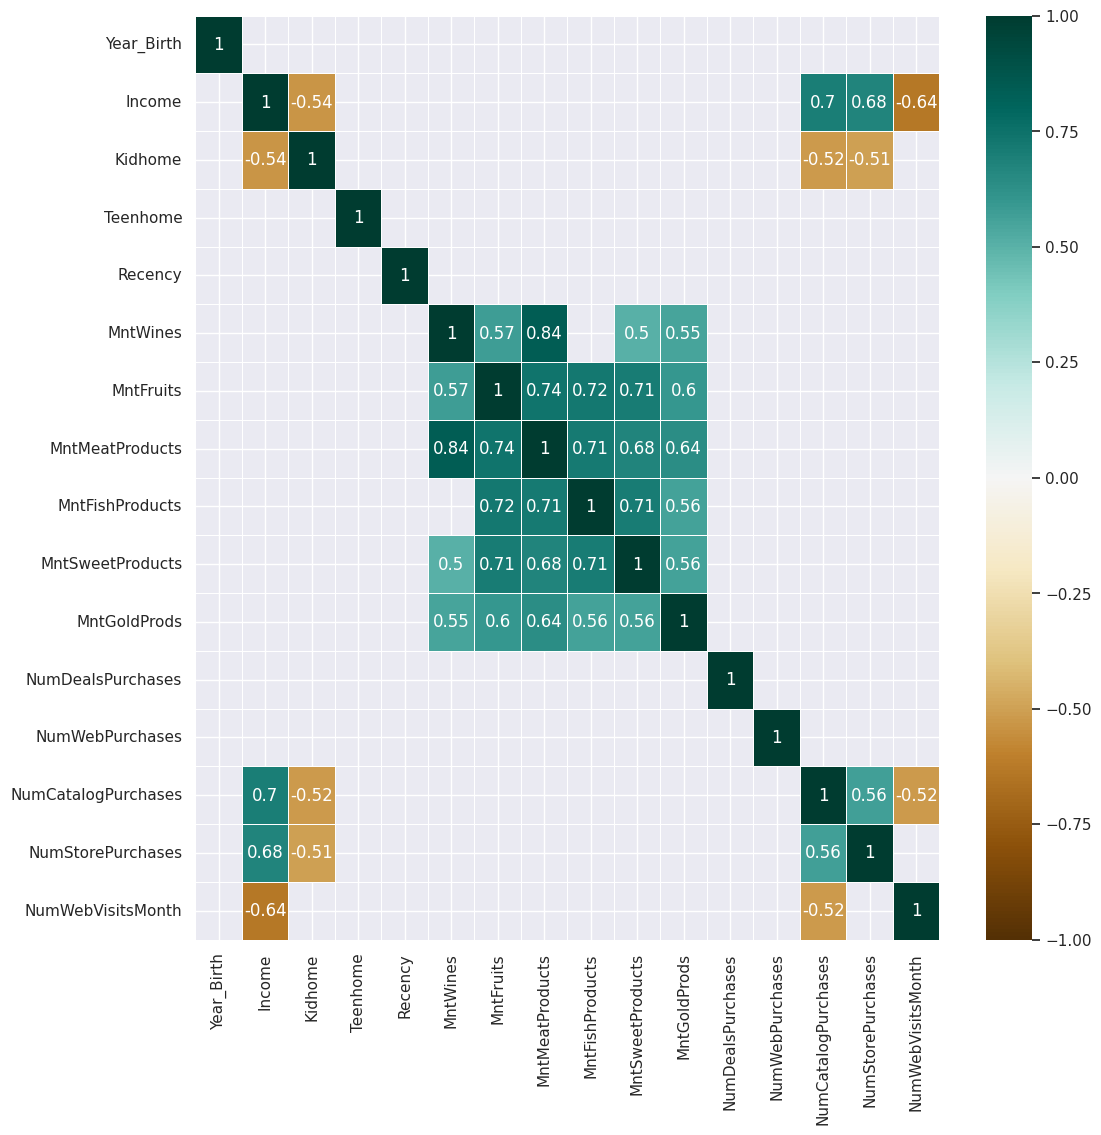

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df_transforme[var_numeriques].corr()[
        df_transforme[var_numeriques].corr().abs() > 0.5
    ],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

# Régression linéaire

## Modèle simple : une variable à expliquer (Y) et une seule variable explicative (X)

### Hypothèses à vérifier pour la régression linéaire simple

1) coefficient de corrélation linéaire entre X et Y non nul

1) la distribution de l’erreur ε est indépendante de la variable X (exogénéité)

2) l'erreur suit une loi normale centrée i.e. E(ε) = 0

3) l’erreur est de variance constante (homoscédasticité)
i.e Var(εi) = s, s une constante

4) les erreurs sont indépendantes (absence d'autocorrélation)
i.e. Cov(εi, εj) = 0, pour tout i, j

In [ ]:
# nettoyage temporaire utile pour ce travail
df["Year_Birth"] = df["Year_Birth"][df["Year_Birth"] > 1930]

<Axes: xlabel='Income'>

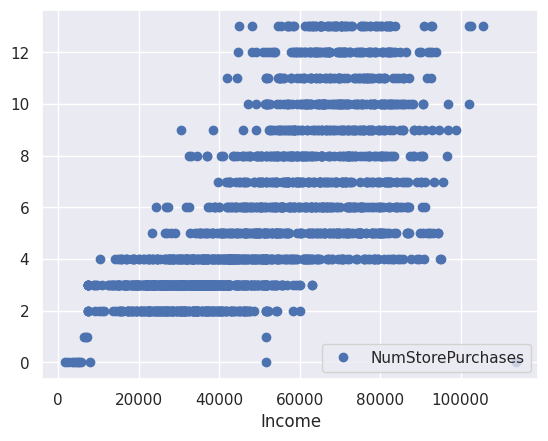

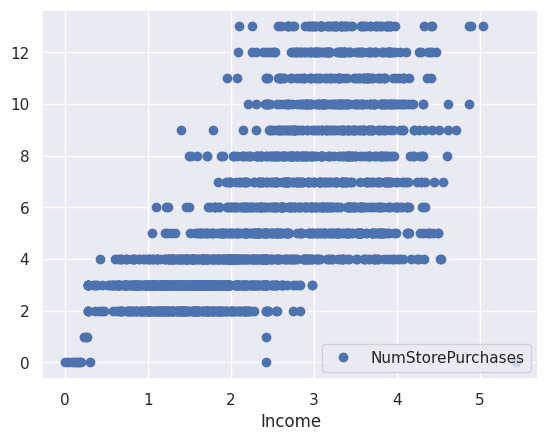

In [ ]:
# demonstration de l efficacite du nettoyage et de la transformation des donnees
df.plot(x="Income", y="NumStorePurchases", style="o")
df_transforme.plot(x="Income", y="NumStorePurchases", style="o")

<Axes: xlabel='Year_Birth'>

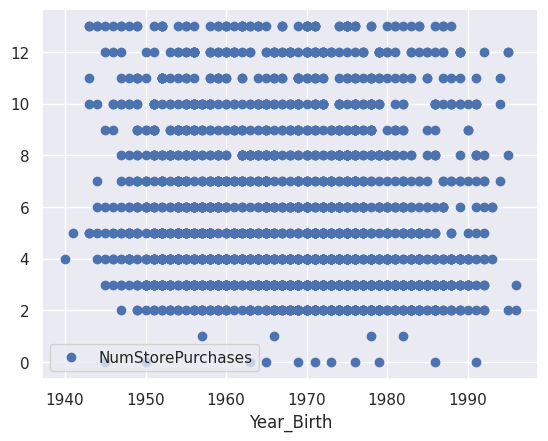

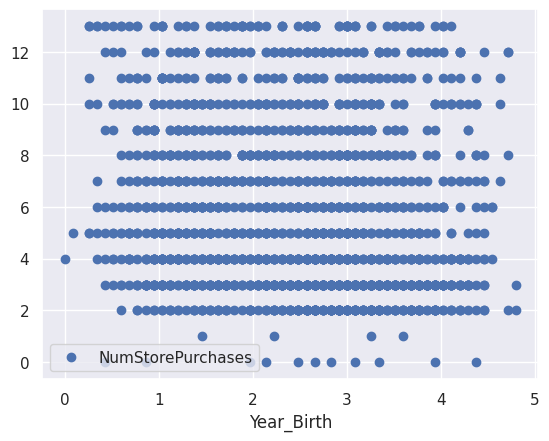

In [ ]:
# un exemple de regression lineaire simple vaine
df.plot(x="Year_Birth", y="NumStorePurchases", style="o")
df_transforme.plot(x="Year_Birth", y="NumStorePurchases", style="o")

<Axes: xlabel='NumStorePurchases'>

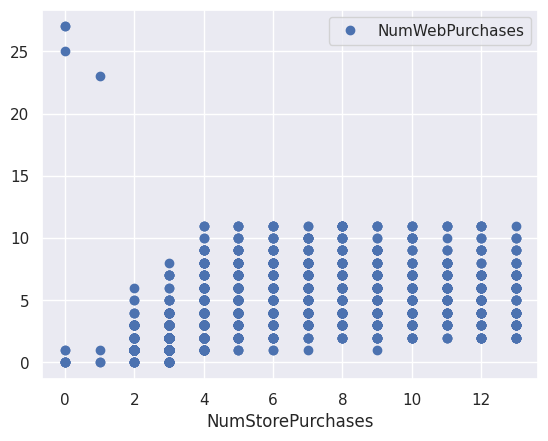

In [ ]:
# un exemple de regression qui devrait etre efficace
df_transforme.plot(x="NumStorePurchases", y="NumWebPurchases", style="o")

<Axes: xlabel='Income'>

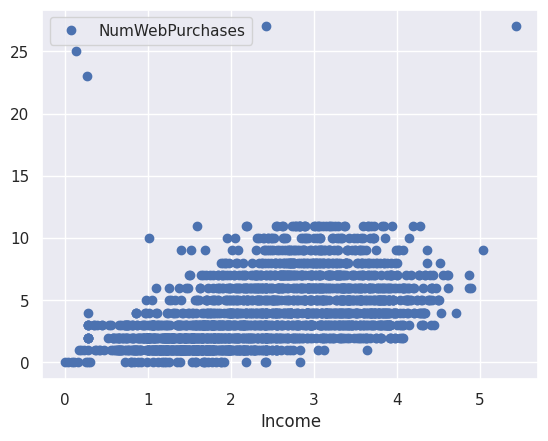

In [ ]:
# on va essayer une regression lineaire simple sur ces deux variables
df_transforme.plot(x="Income", y="NumWebPurchases", style="o")

In [ ]:
# il reste des nan qu on va nettoyer temporairement
na = df_transforme["Income"].isna()
print(sum(na))
na_ = df_transforme["NumWebPurchases"].isna()
print(sum(na_))

df_transforme = df_transforme[~df_transforme["Income"].isna()]

0
0


#### Hypothèse 1 : présence de corrélation linéaire entre X et Y, vérifiée
##### Test de Pearson

In [ ]:
# check hypothese 1

# definition des variables X et Y
income = np.array(df_transforme["Income"]).reshape(-1, 1)
web_purchases = np.array(df_transforme["NumWebPurchases"])

from scipy.stats import pearsonr

print(
    "Le coefficient de corrélation linéaire entre X et Y vaut",
    pearsonr(income.reshape(1, -1)[0], web_purchases)[0],
)

Le coefficient de corrélation linéaire entre X et Y vaut 0.4850098141583113


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
model1 = LinearRegression().fit(income, web_purchases)

#### Résultat de la régression

Le R2 vaut 0.23523451982987975


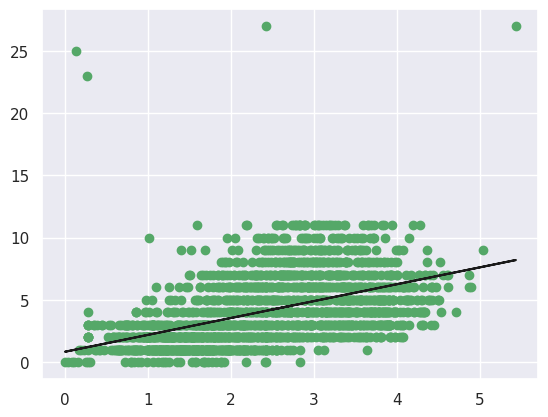

In [ ]:
plt.scatter(income, web_purchases, color="g")
plt.plot(income, model1.predict(income), color="k")

r_sq = model1.score(income, web_purchases)
print(f"Le R2 vaut {r_sq}")

#### Hypothèse 2 : la distribution de l’erreur ε est indépendante de la variable X (exogénéité)
##### independance des erreurs et de la variable explicative X

Le coefficient de corrélation entre X et les residus vaut -2.1013701575253035e-16 les deux variables sont indépendantes


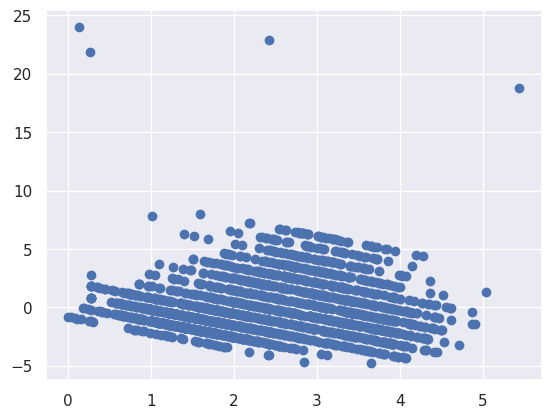

In [ ]:
residuals = web_purchases - model1.predict(income)


plt.scatter(income, residuals)

# test de correlation de pearson
print(
    "Le coefficient de corrélation entre X et les residus vaut",
    pearsonr(income.reshape(1, -1)[0], residuals)[0],
    "les deux variables sont indépendantes",
)

##### independance des erreurs et des valeurs predites

Le coefficient de corrélation entre les résidus et les valeurs prédites vaut -2.0365382557424594e-16 les deux variables sont indépendantes


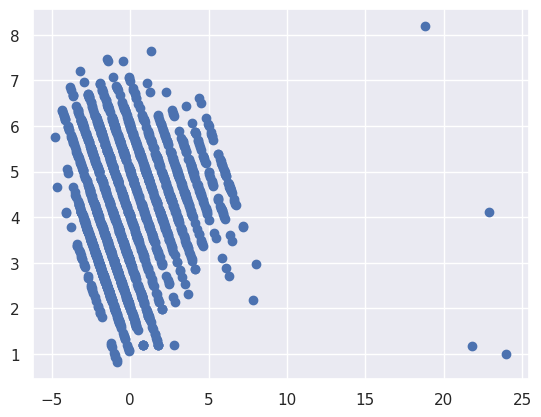

In [ ]:
fitted_values = model1.predict(income)
plt.scatter(residuals, fitted_values)

print(
    "Le coefficient de corrélation entre les résidus et les valeurs prédites vaut",
    pearsonr(fitted_values, residuals)[0],
    "les deux variables sont indépendantes",
)

#### Hypothèse 3 : l'erreur suit une loi normale centrée i.e. E(ε) = 0
##### Affichage de l'histogramme des erreurs et QQplot pour une loi normale

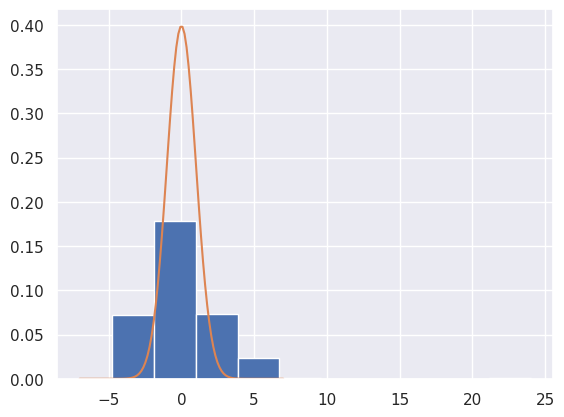

La moyenne des résidus vaut -1.4962223256073013e-16
Mais les résidus ne suivent pas une loi normale
On constate sur le qqplot que les points ne suivent pas la droite x = y


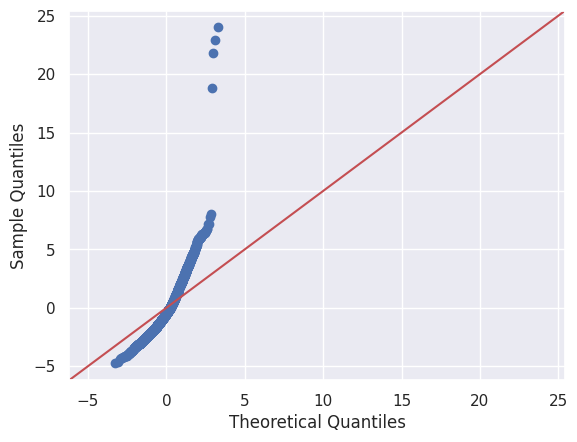

In [ ]:
import statistics
from scipy import stats
import numpy as np
import statsmodels.api as sm

plt.hist(residuals, density=True)

x = np.linspace(-7, 7, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.show()

print("La moyenne des résidus vaut", statistics.mean(residuals))
print("Mais les résidus ne suivent pas une loi normale")

sm.qqplot(residuals, line="45")
print("On constate sur le qqplot que les points ne suivent pas la droite x = y")

##### Test de Shapiro

In [ ]:
print(
    "La pvalue vaut",
    stats.shapiro(residuals)[1],
    "donc on rejette l hypothese de normalite",
)

La pvalue vaut 2.4526113146929193e-36 donc on rejette l hypothese de normalite


#### Hypothèse 4 : l’erreur est de variance constante (homoscédasticité) i.e Var(εi) = s, s une constante

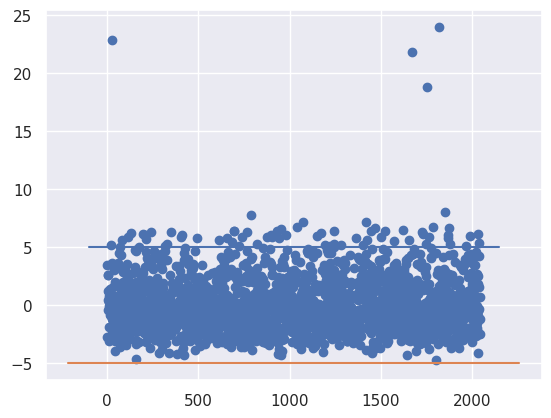

In [ ]:
plt.plot(residuals, "bo")


def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, "-")


abline(0, 5)
abline(0, -5)

#### Hypothèse 5 : absence d'autocorrélation

On remarque une absence d'autocorrélation


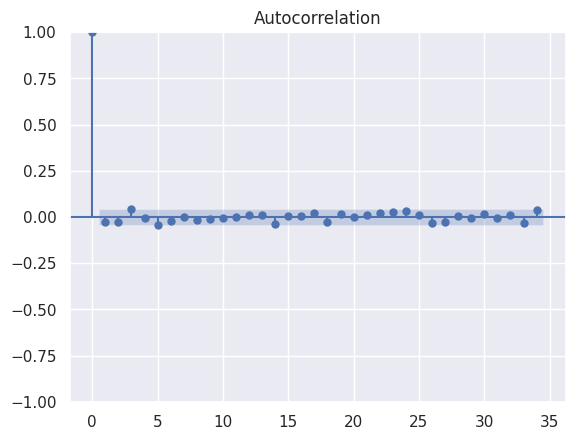

In [ ]:
from statsmodels.graphics.regressionplots import *

sm.graphics.tsa.plot_acf(residuals)
print("On remarque une absence d'autocorrélation")

#### Distance de Cook

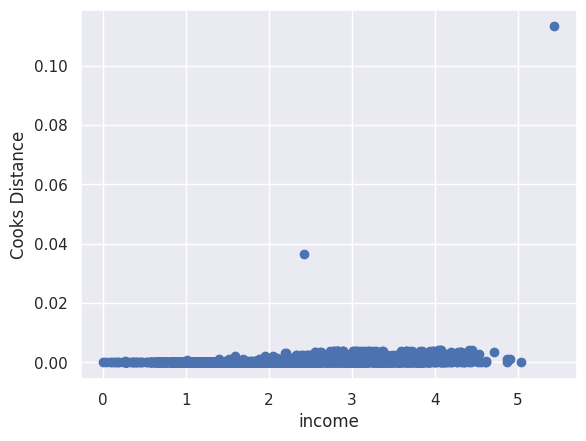

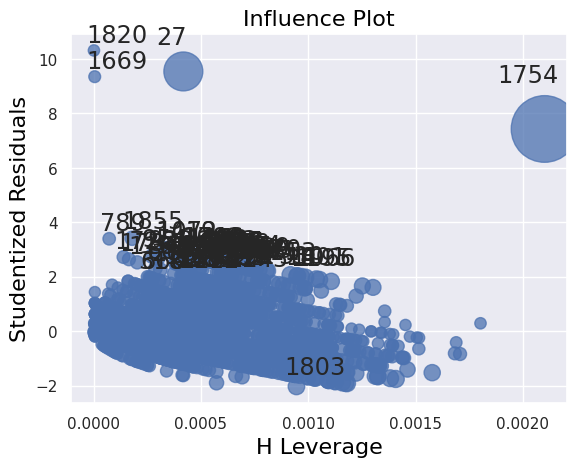

In [ ]:
model_sm = sm.OLS(web_purchases, income).fit()
# on recreer le model avec statsmodel

# create instance of influence
influence = model_sm.get_influence()

# obtain Cook's distance for each observation
cooks = influence.cooks_distance

# display Cook's distances
plt.scatter(income, cooks[0])
plt.xlabel("income")
plt.ylabel("Cooks Distance")
plt.show()

influence_plot(model_sm)
print("")

In [ ]:
# TODO:
# formules
# GLM poissonien sur store purchases

In [ ]:
cooks_bool = cooks[0] > 0.02
cooks_indexes = [i for i, x in enumerate(cooks_bool) if x]
print(cooks_indexes)

[27, 1754]


##### exclusions des valeurs ressortant de l'influence plot

In [ ]:
df_transforme.iloc[[27, 1820, 1669, 1754]]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5255,3.940164,Graduation,Single,2.425188,1,0,20-02-2013,0.655921,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
10311,2.484017,Graduation,Married,0.130995,0,1,05-10-2013,0.000000,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
6237,2.227049,PhD,Single,0.262864,0,2,07-12-2013,3.176037,NaN,NaN,...,1,1,0,0,0,0,0,0,0,0
4619,0.428279,PhD,Single,5.438085,0,0,28-05-2014,0.310699,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_transforme = df_transforme.drop(labels=[5255, 10311, 6237, 4619], axis=0)

Le R2 vaut 0.23493380763060745


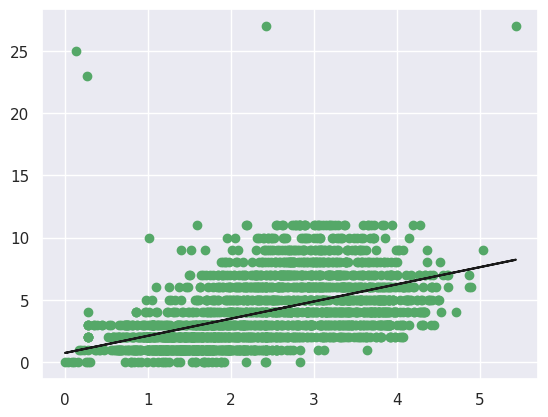

In [ ]:
model1 = LinearRegression().fit(
    np.array(df_transforme["Income"]).reshape(-1, 1), df_transforme["NumWebPurchases"]
)
plt.scatter(income, web_purchases, color="g")
plt.plot(income, model1.predict(income), color="k")

r_sq = model1.score(income, web_purchases)
print(f"Le R2 vaut {r_sq}")

In [ ]:
# UN DEUXIEME EXEMPLE DE REGRESSION SIMPLE

meat = np.array(df["MntMeatProducts"]).reshape(-1, 1)

wines = df["MntWines"]

In [ ]:
model2 = LinearRegression().fit(meat, wines)

[<matplotlib.lines.Line2D>]

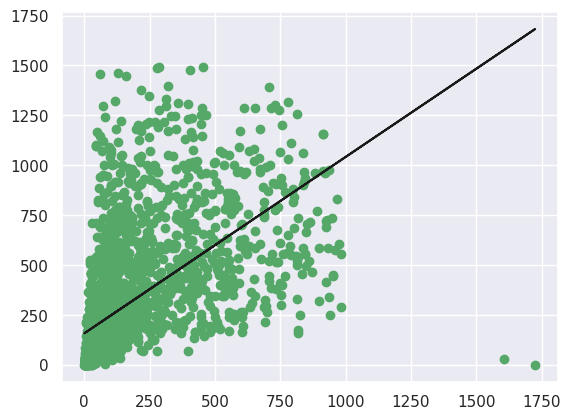

In [ ]:
plt.scatter(meat, wines, color="g")
plt.plot(meat, model2.predict(meat), color="k")

In [ ]:
r_sq = model2.score(meat, wines)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.33752779420768875


In [ ]:
# hypothese 1 : correlation X et Y

print(
    "coeff de corr entre X et Y:",
    pearsonr(meat.reshape(1, -1)[0], wines)[0],
)

coeff de corr entre X et Y: 0.5809714228838527


[<matplotlib.lines.Line2D>]

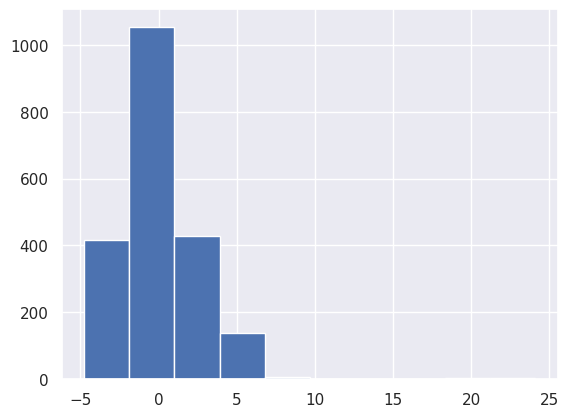

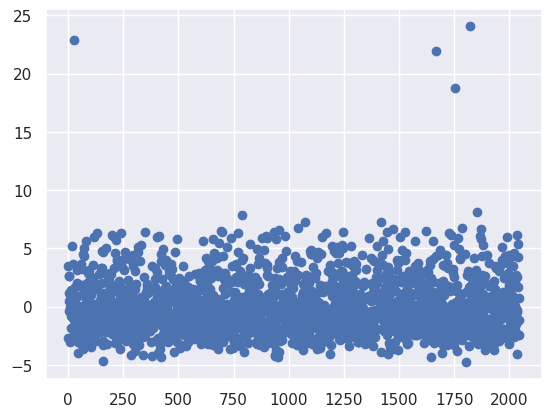

In [ ]:
# check hypothese 2 et 3 : exogeneite et homoscedasticite

residuals = web_purchases - model1.predict(income)
fig1 = plt.figure("distribution des residus")
plt.hist(residuals)
fig2 = plt.figure("variation des residus")
plt.plot(residuals, "bo")
# on a bien les residus suivant une loi normale, centree
# et ont une variance constante

coeff de corr entre X et residus: -0.009222099086539984


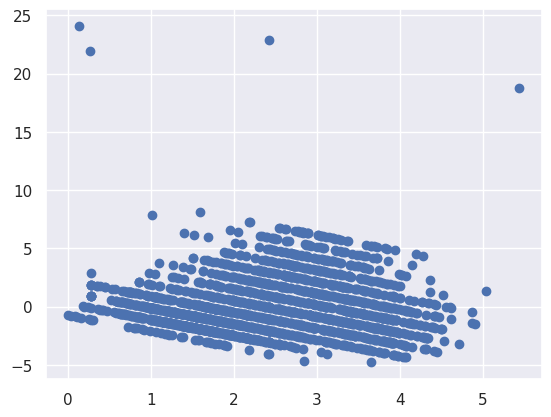

In [ ]:
# independance des erreurs et de la variable explicative X ?

plt.scatter(income, residuals)

# test de correlation de pearson
print(
    "coeff de corr entre X et residus:",
    pearsonr(income.reshape(1, -1)[0], residuals)[0],
)

# OK

## Score du modèle

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
web_predicted = model1.predict(income)

<Axes: ylabel='Count'>

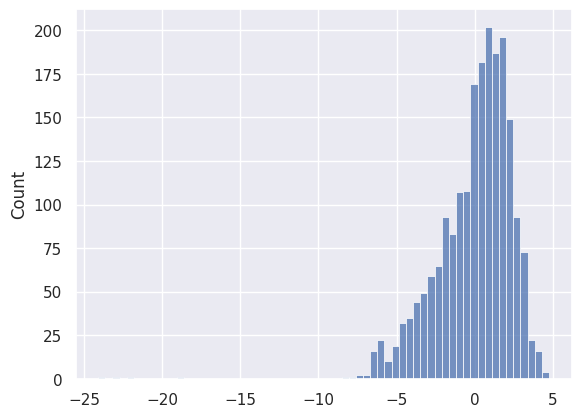

In [ ]:
sns.histplot(web_predicted - web_purchases)

In [ ]:
print(f"MSE = {mean_squared_error(web_purchases, web_predicted)}")
print(f"RMSE = {mean_squared_error(web_purchases, web_predicted, squared=False)}")
print(f"MAE = {mean_absolute_error(web_purchases, web_predicted)}")

MSE = 5.972596770643035
RMSE = 2.443889680538595
MAE = 1.8182907425410988


In [ ]:
# meat / wines
wines_predicted = model2.predict(meat)

<Axes: xlabel='MntWines', ylabel='Count'>

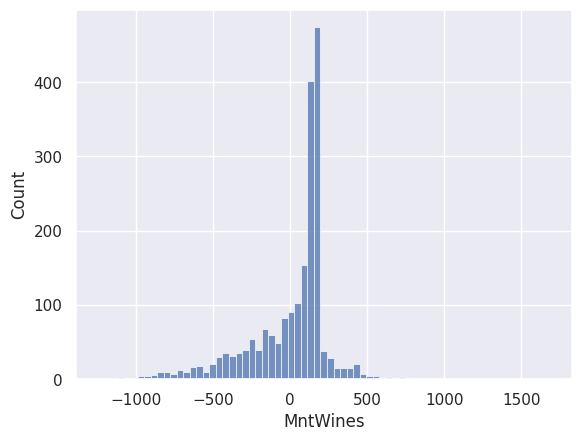

In [ ]:
sns.histplot(wines_predicted - wines)

In [ ]:
print(f"MSE = {mean_squared_error(wines, wines_predicted)}")
print(f"RMSE = {mean_squared_error(wines, wines_predicted, squared=False)}")
print(f"MAE = {mean_absolute_error(wines, wines_predicted)}")

MSE = 75225.93309817121
RMSE = 274.27346407950444
MAE = 205.1048871460377


## Modèle à plusieurs variables explicatives

In [260]:
X = df_transforme[
    ["Income", "NumWebPurchases", "NumDealsPurchases", "NumStorePurchases"]
]
# Y = df_transforme[""]